In [1]:
!pip install pandas
!pip install matplotlib
!pip install chardet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [4]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
df.shape

(1436, 11)

In [9]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [11]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [14]:
df_sort = df[["Price","Age_08_04","KM","HP","Automatic","cc","Doors","Cylinders","Gears","Weight"]]
df_sort

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [15]:
x = df_sort[["Age_08_04","KM","HP","Automatic","cc","Doors","Cylinders","Gears","Weight"]]
y = df_sort['Price']

 we will need sactter matrix , correlation matrix
pairplot, pdlplotting.scatter_matrix

In [16]:
## we are going to check the is there any null values we can interprete by the info() code but we are conferming here
# sum of rcalculating the how many null values are there in the one column
## in this there are no null values
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [17]:
## correlation matrix
## find correlation with dependent 'column''price'
df_sort.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [18]:
## correlation matrix
## find correlation with independent 'columns'.
x.corr()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


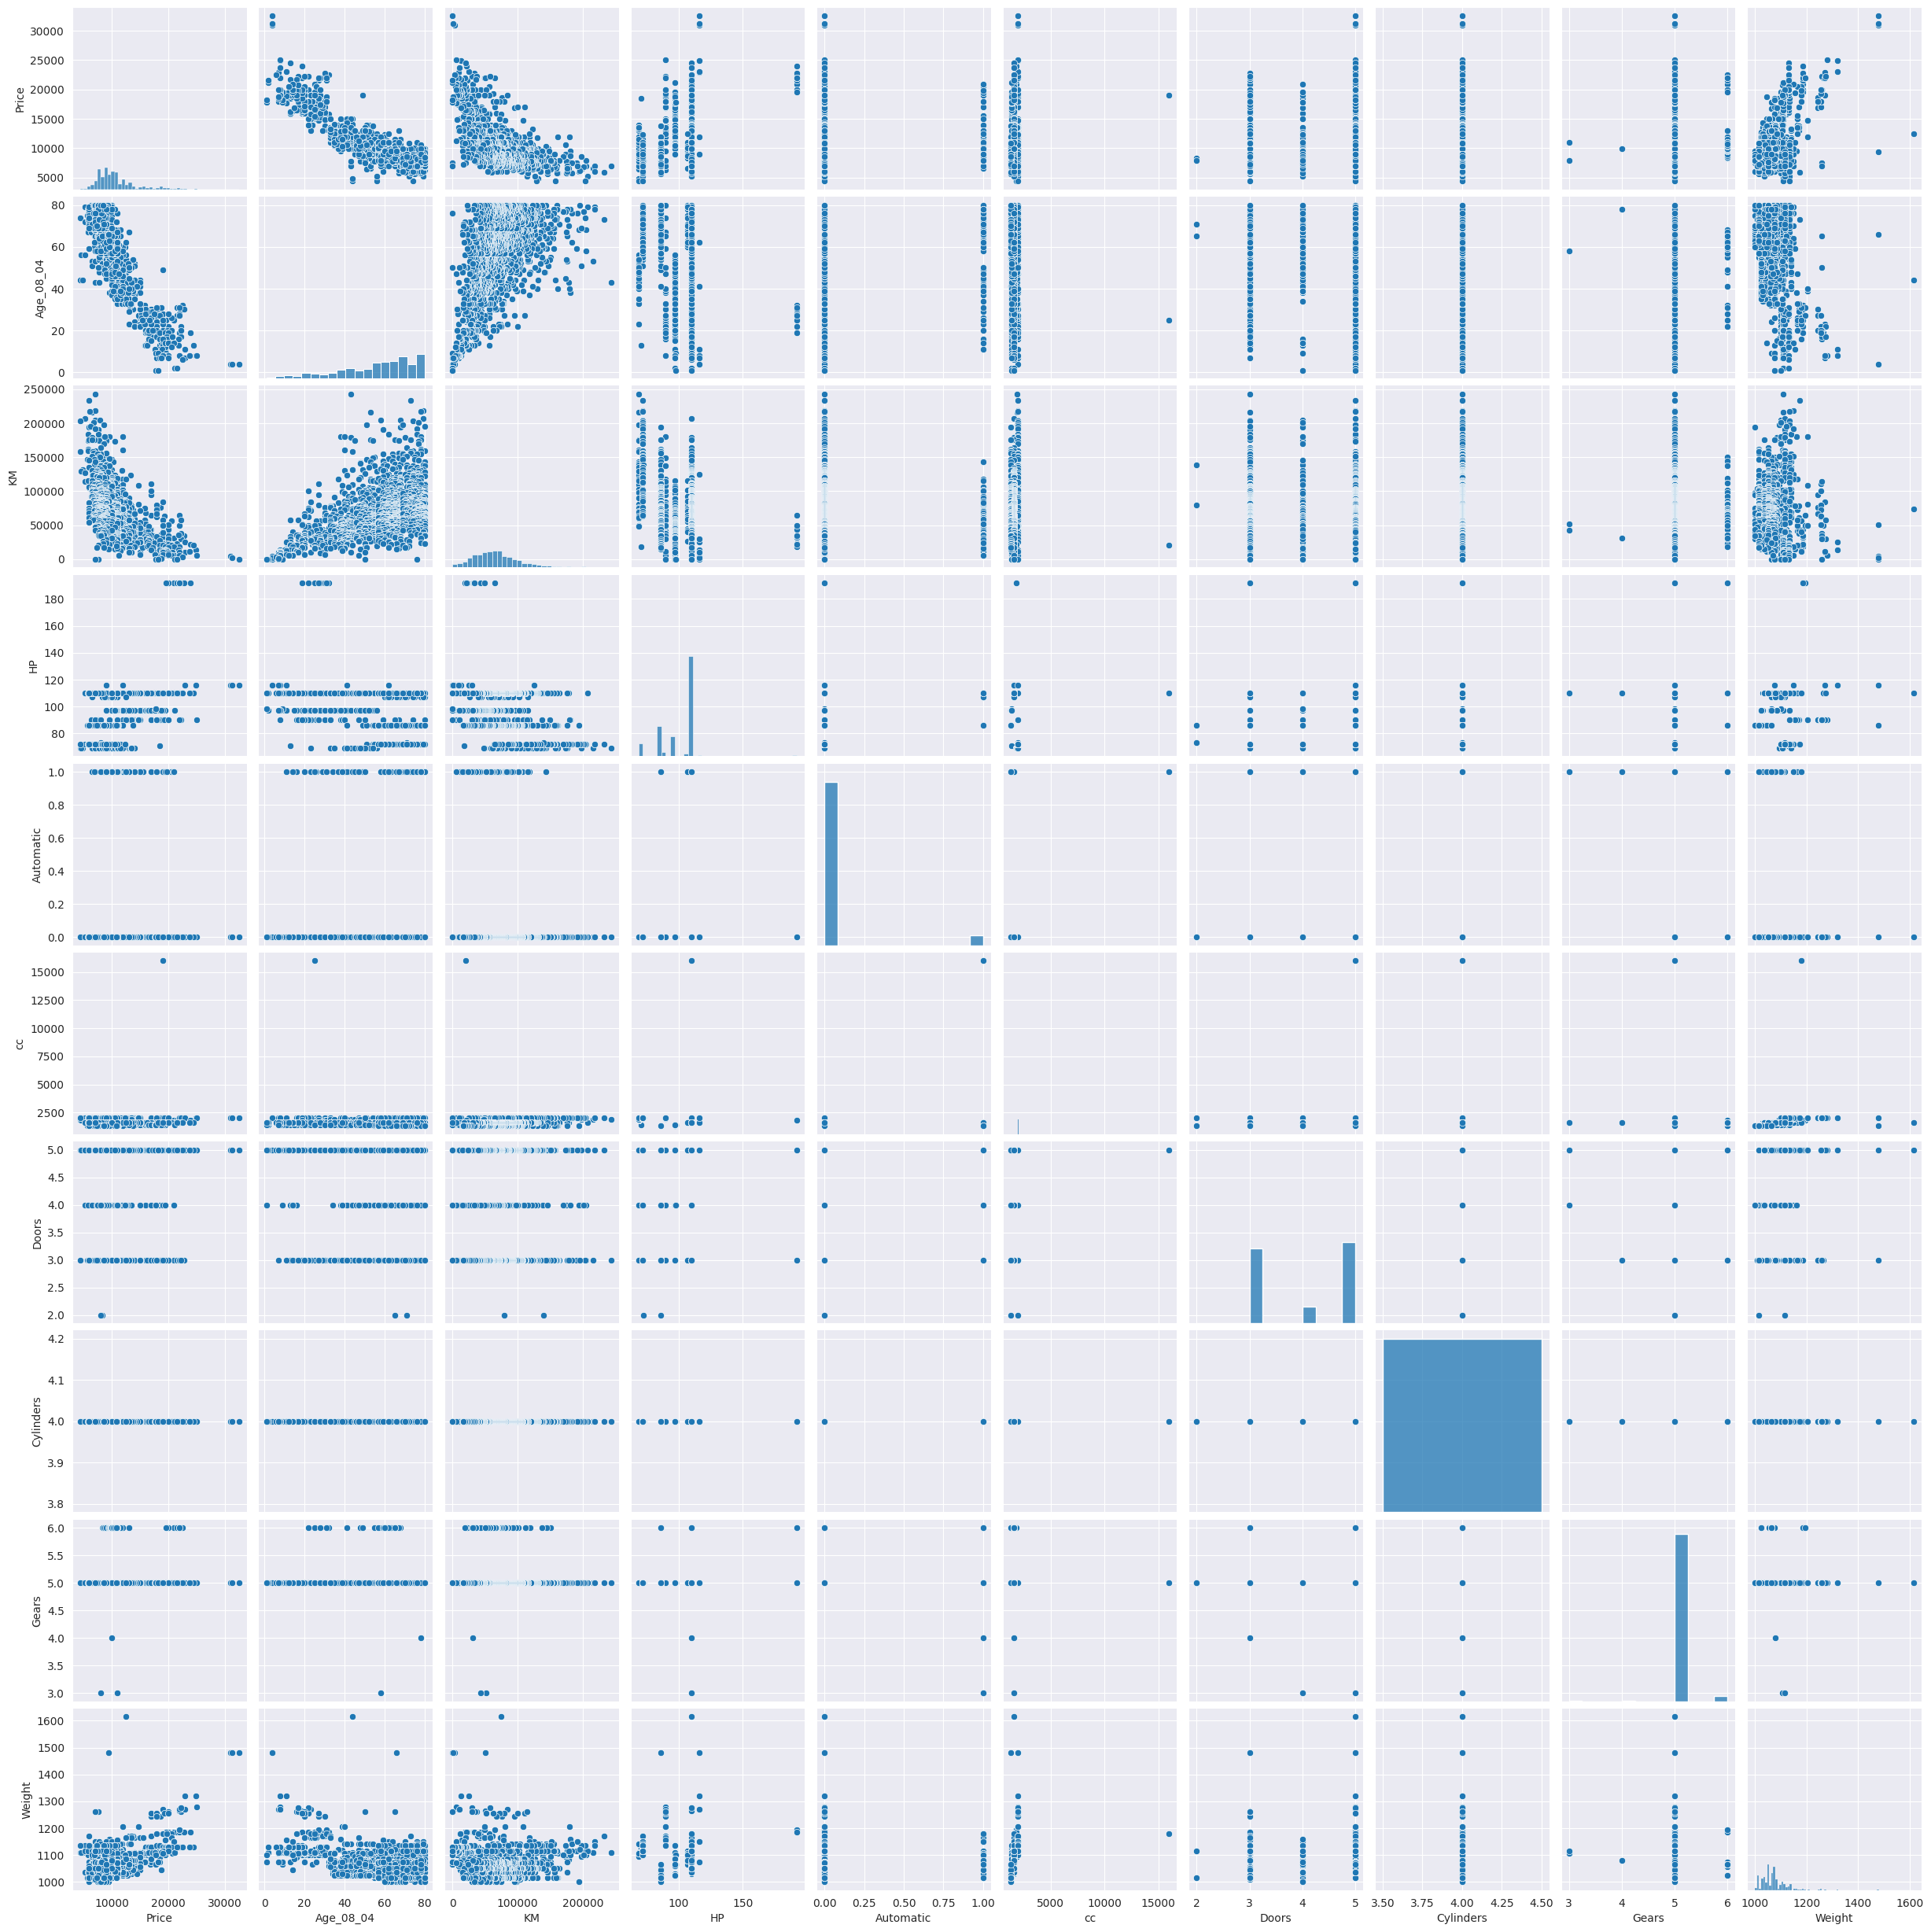

In [19]:

## we will visulize the data

# scatter plot
sns.set_style(style='darkgrid')
sns.pairplot(df_sort)

In [20]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


<Axes: xlabel='Weight', ylabel='Price'>

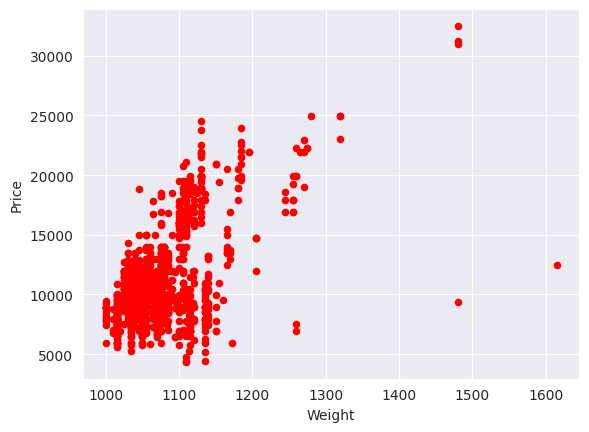

In [22]:
## i have seen high corealtion between weight and quartile tax
## i am plotting the scatter plot for further analyze the data
df_sort.plot.scatter(x = 'Weight', y = 'Price', c = 'red')

<Axes: xlabel='Weight', ylabel='KM'>

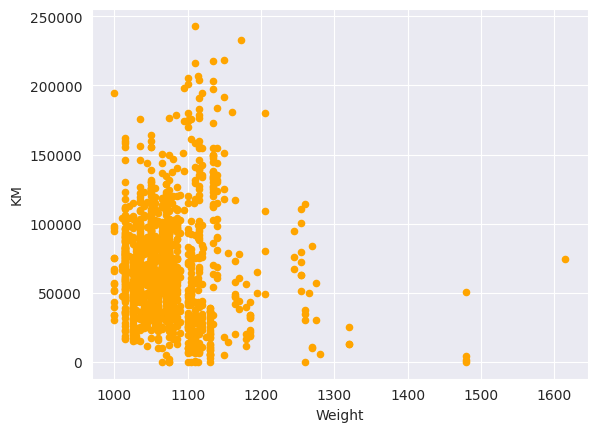

In [25]:
## i have seen high corealtion between weight and price
## i am plotting the scatter plot for further analyze the data
df_sort.plot.scatter(x = 'Weight', y = 'KM', c = 'orange')
## there are so many outliers are there
## yeah we can see increasing trend by the values

In [26]:
## prepare the model building
## ols(ordinery least method)
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit()
##  excess variables can be joined using + symbol

In [27]:
## coefficients beta values
model.params

Intercept    -419.405531
Age_08_04    -123.084400
KM             -0.019455
HP             28.499119
cc             -0.100953
Doors          -4.148726
Gears         670.616336
Automatic     376.315487
Cylinders   -1677.622124
Weight         18.622299
dtype: float64

In [29]:
## t-values and p-values: print(model.tvalues), (model.p-values)

## p-values of gears and quartile-tax are same
## if the values are greater than 0.05(alpha) then they are not significant
## in this case 'cc' and 'gear' these two wre greater than alpha values other values are significant
print("**** t_values ****",'\n',model.tvalues, '\n', '****p-values****','\n', model.pvalues)


**** t_values **** 
 Intercept    -5.414503
Age_08_04   -46.691362
KM          -15.870731
HP           10.902844
cc           -1.125551
Doors        -0.103628
Gears         3.383045
Automatic     2.377447
Cylinders    -5.414503
Weight       21.412318
dtype: float64 
 ****p-values**** 
 Intercept     7.202023e-08
Age_08_04    1.214440e-289
KM            2.316427e-52
HP            1.214261e-26
cc            2.605449e-01
Doors         9.174788e-01
Gears         7.362823e-04
Automatic     1.756409e-02
Cylinders     7.202023e-08
Weight        1.983857e-88
dtype: float64


In [30]:
## r square value of model
(model.rsquared,model.rsquared_adj)

(0.863436080928968, 0.8626704808220526)

In [32]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_Age_08_04 = smf.ols('Price~Age_08_04', data = df_sort).fit()
print(sml_Age_08_04.tvalues, '\n', sml_Age_08_04.pvalues)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


These values are the results of a simple linear regression model. Let's break them down:

Intercept and Age_08_04 (Coefficients): These are the coefficients of your regression model. The Intercept (β0) is 138.907847, which is the expected mean value of 'price' when all 'age_08_04' values are 0. The coefficient for 'age_08_04' (β1) is -68.978267, which means that for each one-unit increase in 'age_08_04', the expected decrease in 'price' is approximately 68.978267 units, holding all other predictors in the model constant.

P-values: The second part of your output seems to be the p-values for the coefficients. Both are 0, suggesting that the intercept and the 'age_08_04' variable are statistically significant predictors of 'price' at the 0.05 significance level. A p-value of 0.0 indicates that the corresponding predictor variable is statistically significant at the 5% level, and it has a meaningful contribution to your response variable in your linear model.

Remember, these interpretations are made under the assumption that the necessary assumptions for the linear regression model are satisfied. These include linearity, independence, homoscedasticity (equal variances), and normality of residuals. If these assumptions are violated, the model's estimates and predictions may not be reliable. It's always a good practice to check these assumptions when interpreting the model.



In [33]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_km = smf.ols('Price~KM', data = df_sort).fit()
print(sml_km.tvalues, '\n', sml_km.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [34]:
sml_HP = smf.ols('Price~HP', data = df_sort).fit()
print(sml_HP.tvalues, '\n', sml_HP.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [35]:
sml_cc = smf.ols('Price~cc', data = df_sort).fit()
print(sml_cc.tvalues, '\n', sml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [36]:
sml_Doors = smf.ols('Price~Doors', data = df_sort).fit()
print(sml_Doors.tvalues, '\n', sml_Doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [37]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [38]:
sml_Doors = smf.ols('Price~Cylinders', data = df_sort).fit()
print(sml_Doors.tvalues, '\n', sml_Doors.pvalues)
sml_Doors = smf.ols('Price~Gears', data = df_sort).fit()
print(sml_Doors.tvalues, '\n', sml_Doors.pvalues)
sml_Doors = smf.ols('Price~Weight', data = df_sort).fit()
print(sml_Doors.tvalues, '\n', sml_Doors.pvalues)

Intercept    112.076774
Cylinders    112.076774
dtype: float64 
 Intercept    0.0
Cylinders    0.0
dtype: float64
Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64
Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


Calculate **VIF**

In [39]:
rsq_price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_price = 1/(1-rsq_price)

rsq_Age_08_04 = smf.ols('Age_08_04~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_HP = 1/(1-rsq_HP)


rsq_cc = smf.ols('cc~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_cc = 1/(1-rsq_cc)


rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_Doors = 1/(1-rsq_Doors)


rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_Gears = 1/(1-rsq_Gears)


rsq_Automatic = smf.ols('Automatic~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_Automatic = 1/(1-rsq_Automatic)



rsq_Cylinders = smf.ols('Cylinders~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_Cylinders = 1/(1-rsq_Cylinders)


rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Automatic+Cylinders+Weight', data=df_sort).fit().rsquared
rsq_Weight = 1/(1-rsq_Weight)


## storing vif values in a data set

d1 = {'Variables':['Price','Age_08_04','KM','HP','cc','Doors','Gears','Automatic','Weight'], 'VIF':[rsq_price,rsq_Age_08_04,rsq_KM,rsq_HP,rsq_cc,rsq_Doors,rsq_Gears,rsq_Automatic,rsq_Weight]}

vif_frame = pd.DataFrame(d1)
vif_frame

<ipython-input-39-c262d58f6431>:5: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_Age_08_04 = 1/(1-rsq_Age_08_04)
<ipython-input-39-c262d58f6431>:8: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_KM = 1/(1-rsq_KM)
<ipython-input-39-c262d58f6431>:11: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_HP = 1/(1-rsq_HP)
<ipython-input-39-c262d58f6431>:15: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_cc = 1/(1-rsq_cc)
<ipython-input-39-c262d58f6431>:19: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_Doors = 1/(1-rsq_Doors)
<ipython-input-39-c262d58f6431>:23: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_Gears = 1/(1-rsq_Gears)
<ipython-input-39-c262d58f6431>:27: RuntimeWarning: divide by zero encountered in scalar divide
  rsq_Automatic = 1/(1-rsq_Automatic)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encoun

,Variables,VIF
0,Price,7.322578
1,Age_08_04,inf
2,KM,inf
3,HP,inf
4,cc,inf
5,Doors,inf
6,Gears,inf
7,Automatic,inf
8,Weight,inf


In [43]:
df_sort.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


AIC ** interperatation should be r square value should be more and aic value should low

In [44]:
## Build model with
## HP and CC

import statsmodels.formula.api as smf
## model with hp
sml_HP = smf.ols('Price~HP+Age_08_04+KM+Doors+Gears+Cylinders+Weight', data = df_sort).fit()
print(model.rsquared,model.aic)
## feature which gives you high r squared value and less aic value should be kept

0.863436080928968 24772.515714430712


In [45]:
# model built with cc
sml_cc = smf.ols('Price~cc+Weight+KM+Doors+Gears+Cylinders+Age_08_04', data = df_sort).fit()
print(model.rsquared,model.aic)

0.863436080928968 24772.515714430712


above interpretation is the of two column were the same so two of the columns are participating same for result for the better result we can use 'ensemble methods' for better results.
Residual Analysis

Test for normality of residual(Q-Q Plot

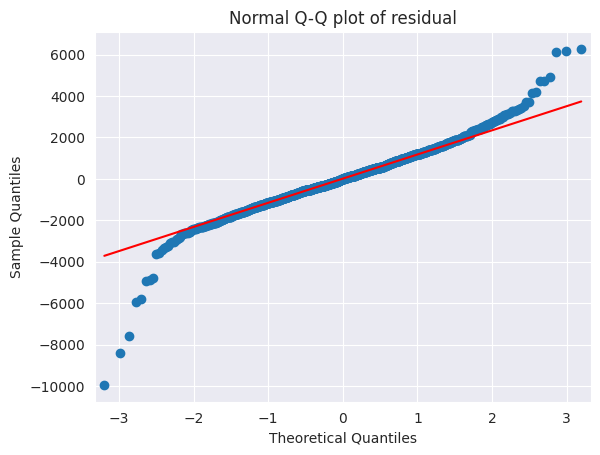

In [46]:
import statsmodels.api as sm
sml_cc = smf.ols('Price~cc+Weight+KM+Doors+Gears+Cylinders+Age_08_04', data = df_sort).fit() ## model.resid is error
qqplot=sm.qqplot(model.resid,line='q') ## qq plot  ## when ever we write line='q' then we get 45* line
plt.title("Normal Q-Q plot of residual")  ## points that are away from line are outliers  ## matplotlib
plt.show()

In [48]:
## to print index of values those are outliers
outliers = list(np.where(model.resid>5000))
outliers

[array([109, 147, 523])]

In [ ]:
## Residual plot for Homoscedasticity;constant variance

In [ ]:

#define function for standardization


Residual plot for Homoscedasticity : constant variance

In [52]:
## function defination for dtandardization i.e z score, function name : get_standardized_values
## z-score for standardization
## normalization is called min max sacaling

def get_stanradized_values( data_sort ):
  return (data_sort - data_sort.mean())/data_sort.std()    ## this is z score = (xi - mean)/std.dev

## xi = every point - mean divided by(/) standard deviation

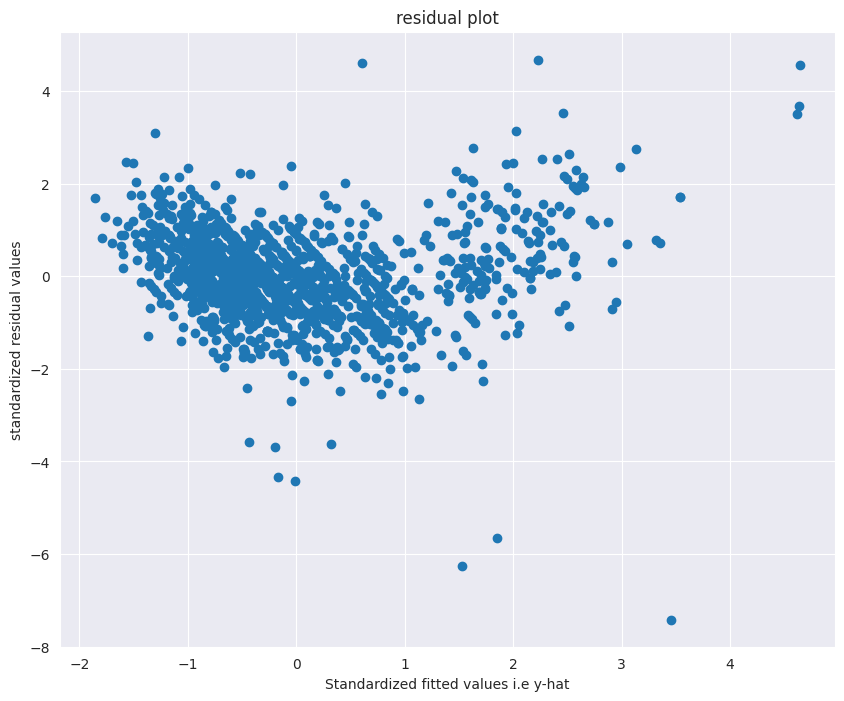

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(get_stanradized_values(model.fittedvalues),   ## fitted value is y hat, model.resid is error
            get_stanradized_values(model.resid))  ## error vs fitted values

plt.title('residual plot')
plt.xlabel('Standardized fitted values i.e y-hat')
plt.ylabel('standardized residual values')
plt.show()